In [1]:
from src.infer_models import infer
#from src.preprocess import preprocess
from src.archs_models import stdlogistic
from src.opts_models_new import gradient_descent
from src.archs_models import linear
from src.archs_models import ReLU
from src.opts_models import batchgd

import subprocess
import os
import sys
import pathlib
from pathlib import Path
from multiprocessing.sharedctypes import Value
from this import d
from tkinter.font import names
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing


import numpy as np
from numpy.core.shape_base import block
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"]})

np.set_printoptions(precision=4)
np.set_printoptions(formatter={'float': "{:0.4f}".format})

# Ensure path is referenced to this script's root
# thisdir = os.path.dirname(__file__)
thisdir = Path.cwd()
# os.chdir(thisdir)
os.chdir(sys.path[0])
print(sys.path[0])
print(os.getcwd())

figs_dir = os.path.join(thisdir, 'figs/')
if not os.path.isdir(figs_dir):
    os.makedirs(figs_dir)

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
c:\Users\aorukotan\OneDrive - Smithfield Foods, Inc\Desktop\Machine Learning\Workspace\Linear  Regression\IA1
c:\Users\aorukotan\OneDrive - Smi

In [2]:
# Training Normalized Data
un_normalizeddata = pd.read_csv("csvs/Pre_processed_Train_Data.csv")
traindata = pd.DataFrame(un_normalizeddata)
u_dft = traindata

# Validation Normalized Data
un_normalizeddevdata = pd.read_csv("csvs/Pre_processed_Val_Data.csv")
devdata = pd.DataFrame(un_normalizeddevdata)
u_dfv = devdata

In [3]:
# DEV: Model Training and Selection

# - max. number of iterations (fixed) - epochs
epochs = int(5e3)
#error_list = []

# - learning-rate (step-size) selection set
lrs =  [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
# learning rate
#stepsize = 1e-2

# - regularization scale size selection set
#lregs = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
# lregs = [1e-3, 1e-2, 1e-1, 1]
# regsize = 0.01 # 1e-1 to 1e-2 to 1e-3

# Extracting the X and Y component of both test and validation data 
X = []
Y = []
Xv = []
Yv = []

# Redefining X and Y from the dictionary object
# X = traindata['X']
# print(X)
# Xv = devdata['X']
# Xdf = pd.DataFrame(X)
# Xdfv = pd.DataFrame(Xv)

# # class_label = dataset[:, -1] # for last column
# # dataset = dataset[:, :-1] # for all but last column
# # Extracting X and Y as a dataframe object and convert to numpy array
# # Extracting X --> Training Data
X= u_dft.iloc[:,:-1]
X = X.to_numpy().reshape((X.shape))

Y = u_dft.iloc[:,-1:] # Select Last column of the training data as a dataframe object
Y = Y.to_numpy().reshape((Y.shape))

Xv = u_dfv.iloc[:,:-1]
Xv = Xv.to_numpy().reshape(Xv.shape)

Yv = u_dfv.iloc[:,-1:] # Select Last column of the validation data as a dataframe object
Yv = Yv.to_numpy().reshape(Yv.shape)


# Transform the training data to X, Y, rows and cols element
traindata = {'X': X.copy(), 'Y': Y.copy(), 'rows': X.shape[0], 'cols': X.shape[1]}


# Transform the Valivation data to X, Y, rows and cols element
devdata = {'X': Xv.copy(), 'Y': Yv.copy(), 'rows': Xv.shape[0], 'cols': Xv.shape[1]}


In [4]:
# - random weight initialization
W = np.random.uniform(0, 0.02, (traindata["cols"], 1))
#print(W)
# bias initialization
W[0] = np.zeros(shape=(1, 1))
#print(W[0])


In [5]:

# Turns out lists and dicts are passed by ref. in python.
# They behave as global variables, modified in function they are passed to.

# model's number of largest weighted features
# bigks = 5

# list to hold all models
model_sels = []
k = []
regsize = 0

# regularization rate
# regtype = 1
regtype = 2
# regtype = 3

# Standardization
#scaler = preprocessing.StandardScaler()
#scaled_Data = scaler.fit_transform(traindata["X"])
#Normalized_Data = pd.DataFrame(scaled_Data, columns = traindata["X"].columns, index = traindata["X"].index)
#Normalized_Data = Normalized_Data.to_numpy()
#print(Normalized_Data)

for stepsize in lrs:
    #for regsize in lregs:

    print(f'\n*******Model Selection************************')
    print('(start): Learning rate: ', stepsize)
        # print(W.T) # to debug muatbility
        # print(W.copy())

        # - modeldict: data structure that holds details of the trained model
    modeldict = {'W': W.copy(), 'stepsize': stepsize,
                    'reg_type': regtype, 'reg_size': regsize, 'epochs': epochs,
                    'cols': traindata["cols"],
                    #'normalize': Normalized_Data,
                    'mse_train': None, 'mse_dev': None,
                    'facc_train': None, 'facc_dev': None,
                    'epoch': None,
                    'sparsity': None
                    }

    # - train: iterative line search (full batch)
    gradient_descent(modeldict, linear, traindata, devdata)
    model_sels.append(modeldict)


    if np.isfinite(modeldict['mse_train'][-1]):          
            print(f"MSE (Train): {modeldict['mse_train'][-1]:2.4f} | "
                  f"(Validation): {modeldict['mse_dev'][-1]:2.4f}")
            print(f"Class Accuracy (Train): {modeldict['facc_train'][-1]:2.4f} | "
                  f"(Validation): {modeldict['facc_dev'][-1]:2.4f}")

            #print(W.T)
            print(f"Model Sparsity: {modeldict['sparsity']}")
            print('Final Learned Weights')
            # print((modeldict['W']).T)
            # Print top 5 weighted features
            #print("Features (Top-5) with largest weight magnitude")
            #print(modeldict['WBigK_feats'].tolist())
            #wbigk_str = np.array2string(modeldict['WBigK'].flatten(),
                                          #formatter={'float_kind': '{0:2.4f}'.format})
            #print(wbigk_str)
            print('(end): ----\n')



*******Model Selection************************
(start): Learning rate:  1e-06
k:     0, mse(train): 2269073.9579, mse(dev): 754996385812541312.0000 | facc(train): 0.0005, facc(dev): 0.0000
MSE (Train): 2269073.9579 | (Validation): 754996385812541312.0000
Class Accuracy (Train): 0.0005 | (Validation): 0.0000
Model Sparsity: 16
Final Learned Weights
(end): ----


*******Model Selection************************
(start): Learning rate:  1e-05
k:     0, mse(train): 2269073.9579, mse(dev): 75504130808325996544.0000 | facc(train): 0.0005, facc(dev): 0.0000
MSE (Train): 2269073.9579 | (Validation): 75504130808325996544.0000
Class Accuracy (Train): 0.0005 | (Validation): 0.0000
Model Sparsity: 21
Final Learned Weights
(end): ----


*******Model Selection************************
(start): Learning rate:  0.0001
k:     0, mse(train): 2269073.9579, mse(dev): 7550458003998141054976.0000 | facc(train): 0.0005, facc(dev): 0.0000
MSE (Train): 2269073.9579 | (Validation): 7550458003998141054976.0000
Cla

Model Accuracy Plot...	


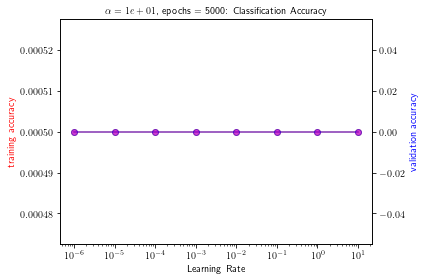

Done.

Sparsity Plot...	


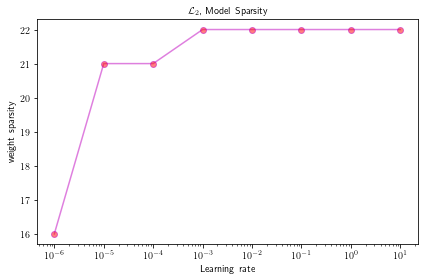

Done.



In [6]:
faccs_train = []
faccs_dev = []
regular_szs = []
sparse_wts = []
stepsize_szs = []
epoch = []

for mdl in model_sels:
    faccs_train.append(mdl['facc_train'][-1])
    faccs_dev.append(mdl['facc_dev'][-1])
    sparse_wts.append(mdl['sparsity'])
    regular_szs.append(mdl['reg_size'])
    epoch.append(mdl['epochs'])
    stepsize_szs.append(mdl['stepsize'])
    #errors.append(mdl['error_list'])


print('Model Accuracy Plot...\t')
fig, ax3 = plt.subplots(figsize=(6, 4), tight_layout=True)
ax3.semilogx(stepsize_szs, faccs_train,
             color='r', marker='o', markerfacecolor='m', zorder=2.5, alpha=0.5)
ax3.set_ylabel(f'training accuracy', color='r')
ax4 = ax3.twinx()
ax4.semilogx(stepsize_szs, faccs_dev,
             color='b', marker='o', markerfacecolor='m', zorder=2.5, alpha=0.5)
ax4.set_ylabel(f'validation accuracy', color='b')
ax3.set_xlabel(f'Learning Rate')
#ax3.set_xlabel(f'$\\mse$, # of iterations')
ax3.set_title(f"$\\alpha = {stepsize:2.1g}$, epochs = {epochs}: Classification Accuracy",
              color='k', weight='bold', size=10)

#fig, ax8 = plt.subplots(figsize=(6,4), tight_layout=True)
#ax8.semilogx(epochs,)
# plt.ion and save figure
plt.savefig(figs_dir + f"TrainValcmp_plt.pdf", bbox_inches='tight')
plt.show(block=False)
print('Done.\n')

# Other Plots
# plt.plot(modeldict['mse_train'], modeldict['epochs'])
# plt.xlabel('# of iterations')
# plt.ylabel('Training')
# print('Done.\n')


print('Sparsity Plot...\t')
fig, ax5 = plt.subplots(figsize=(6, 4), tight_layout=True)
ax5.semilogx(stepsize_szs, sparse_wts,
              color='m', marker='o', markerfacecolor='r', zorder=2.5, alpha=0.5)
ax5.set_xlabel(f'Learning rate')
ax5.set_ylabel(f'weight sparsity')
ax5.set_title(f"$\\mathcal{{L}}_{{{regtype:1d}}}$, Model Sparsity",
               color='k', weight='bold', size=10)
plt.ion
plt.savefig(figs_dir + f"Sparsityplt.pdf", bbox_inches='tight')
plt.show(block=False)
print('Done.\n')
